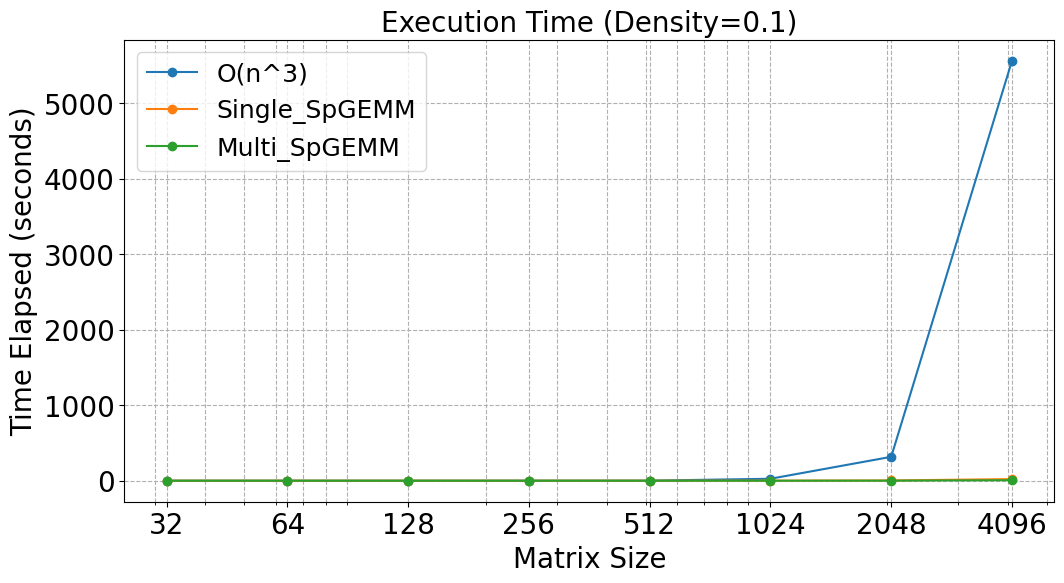

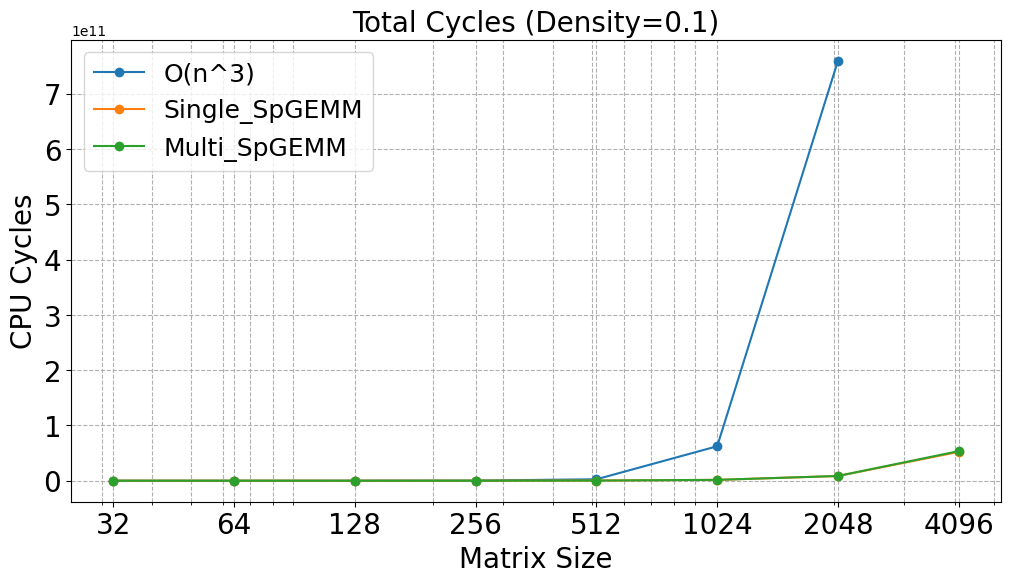

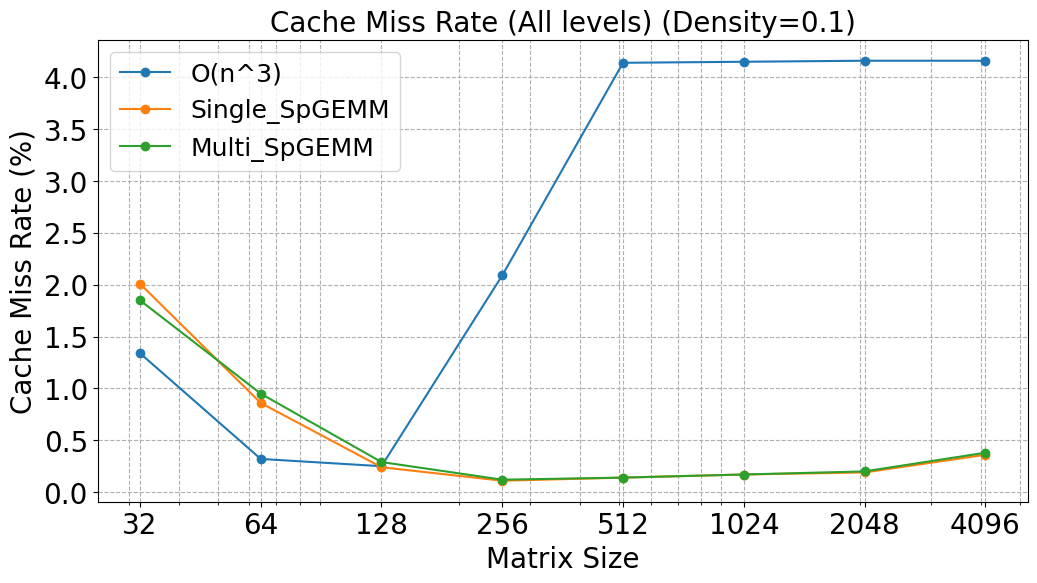

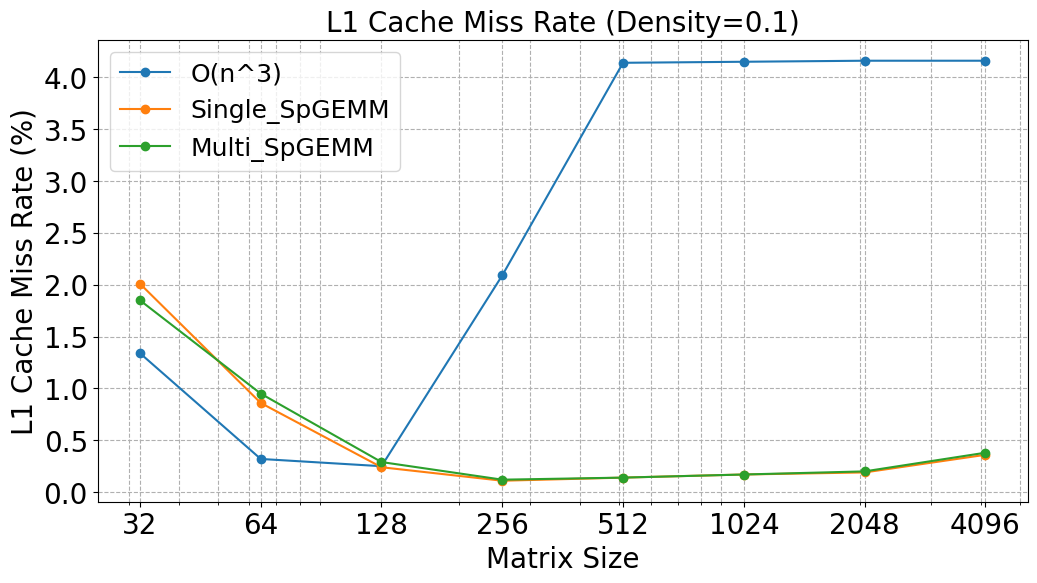

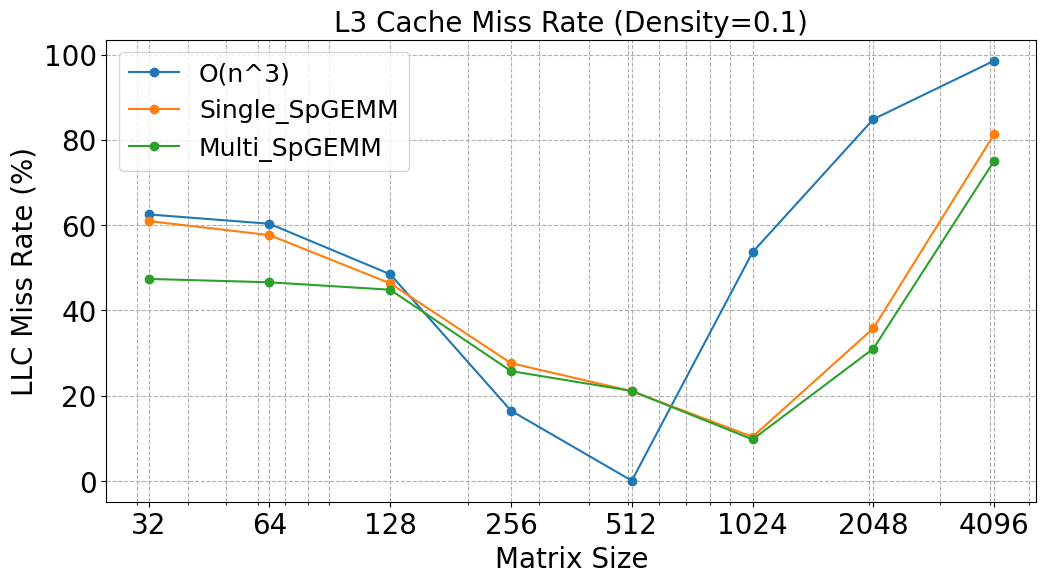

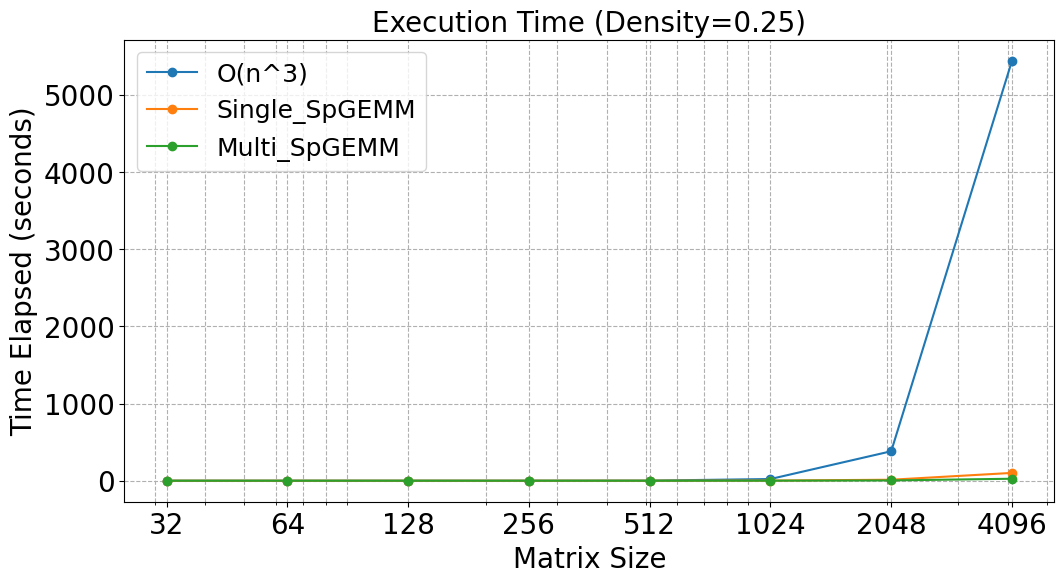

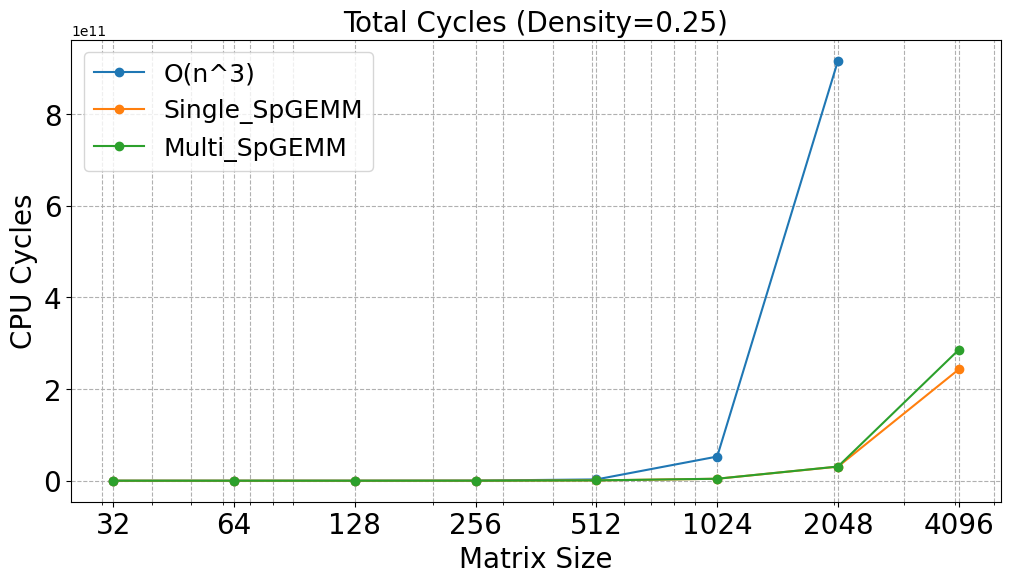

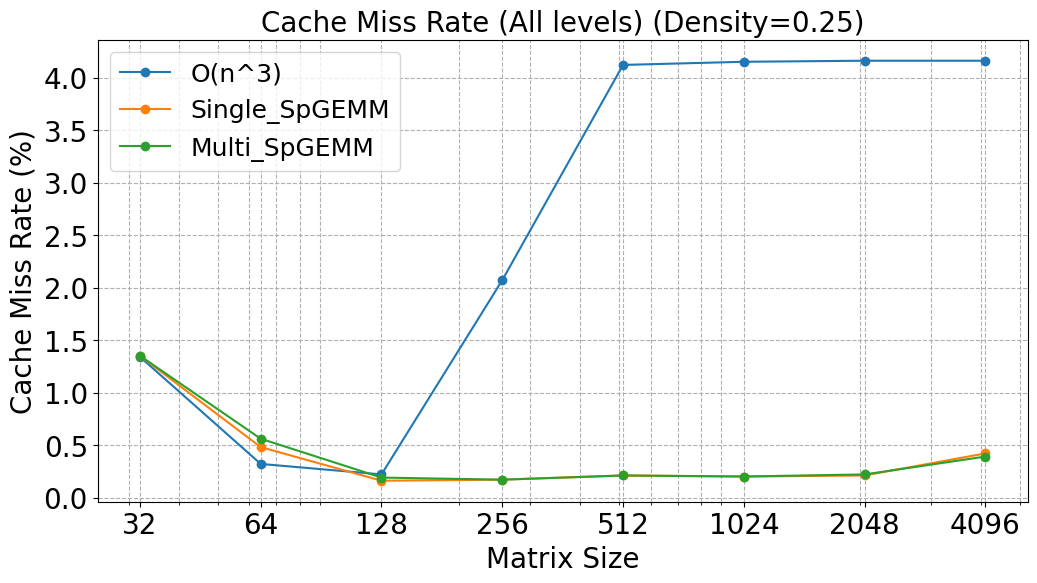

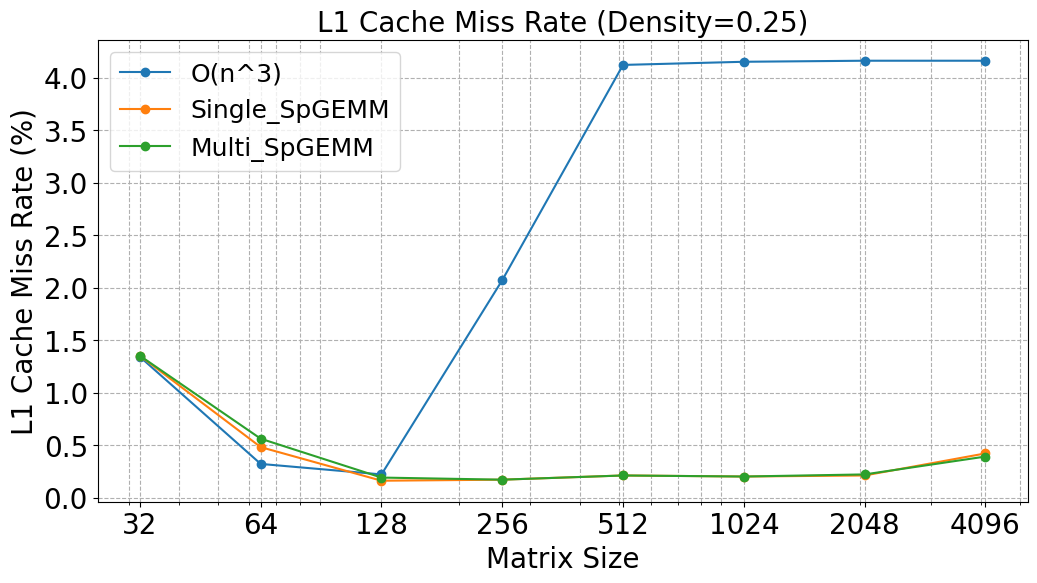

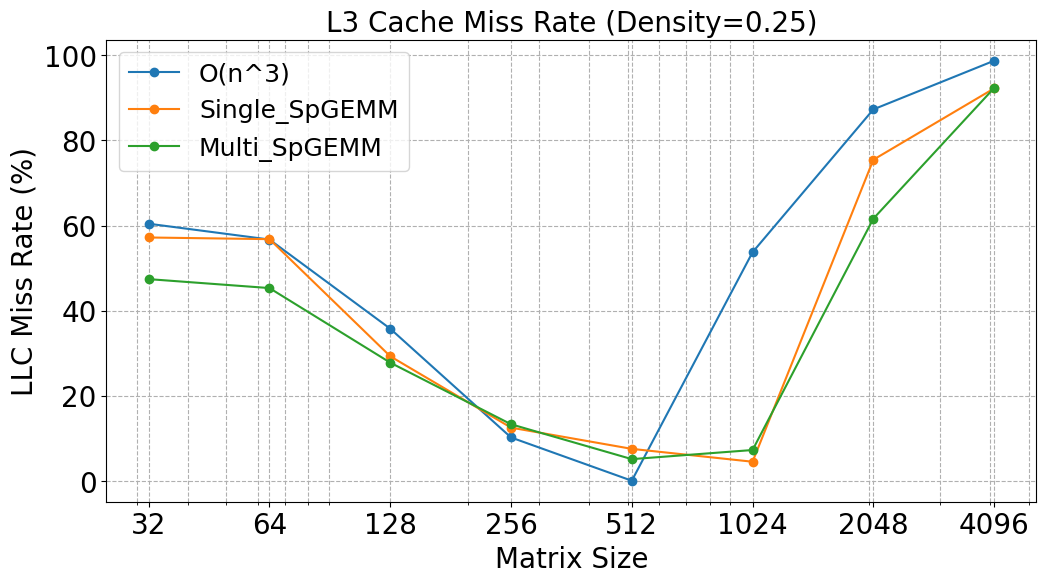

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义要读取的文件路径
file_path = '/Users/edlin/Desktop/Courses/UoE_Sem2/Dissertation/exp_data/perf_data_0711.txt'

# 读取数据
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_entry = {}
    for line in lines:
        if 'O(n^3)' in line or 'Single_SpGEMM' in line or 'Multi_SpGEMM' in line:
            if current_entry:
                data.append(current_entry)
            parts = line.split()
            current_entry = {'method': parts[0], 'size': int(parts[1]), 'density': float(parts[2])}
        elif 'cycles' in line:
            current_entry['cycles'] = int(line.split()[0].replace(',', ''))
        elif 'cache-references' in line:
            current_entry['cache_references'] = int(line.split()[0].replace(',', ''))
        elif 'cache-misses' in line:
            current_entry['cache_misses'] = float(line.split()[3].strip('%'))  # cache miss rate
        elif 'L1-dcache-loads' in line:
            current_entry['l1_cache_loads'] = int(line.split()[0].replace(',', ''))
        elif 'L1-dcache-load-misses' in line:
            current_entry['l1_cache_misses'] = float(line.split()[3].strip('%'))  # L1 cache miss rate
        elif 'LLC-loads' in line:
            current_entry['llc_loads'] = int(line.split()[0].replace(',', ''))
        elif 'LLC-load-misses' in line:
            current_entry['llc_misses'] = float(line.split()[3].strip('%'))  # LLC miss rate
        elif 'seconds time elapsed' in line:
            current_entry['time_elapsed'] = float(line.split()[0])
    if current_entry:
        data.append(current_entry)

# 转换为 DataFrame
df = pd.DataFrame(data)

# 定义绘图函数
def plot_data(df, metric, density, include_on3=True):
    plt.figure(figsize=(12, 6))
    methods = df['method'].unique()
    if not include_on3:
        methods = [method for method in methods if method != 'O(n^3)']
    
    for method in methods:
        subset = df[(df['method'] == method) & (df['density'] == density)]
        plt.plot(subset['size'], subset[metric], marker='o', label=method)  # 在数据点上标上圆点
    
    plt.xlabel('Matrix Size', fontsize=20)
    
    # 添加适当的 y 轴标签和单位
    if metric == 'time_elapsed':
        plt.ylabel('Time Elapsed (seconds)', fontsize=20)
        plt.title(f'Execution Time (Density={density})', fontsize=20)
    elif metric == 'cycles':
        plt.ylabel('CPU Cycles', fontsize=20)
        plt.title(f'Total Cycles (Density={density})', fontsize=20)
    elif metric == 'cache_misses':
        plt.ylabel('Cache Miss Rate (%)', fontsize=20)
        plt.title(f'Cache Miss Rate (All levels) (Density={density})', fontsize=20)
    elif metric == 'l1_cache_misses':
        plt.ylabel('L1 Cache Miss Rate (%)', fontsize=20)
        plt.title(f'L1 Cache Miss Rate (Density={density})', fontsize=20)
    elif metric == 'llc_misses':
        plt.ylabel('LLC Miss Rate (%)', fontsize=20)
        plt.title(f'L3 Cache Miss Rate (Density={density})', fontsize=20)
    else:
        plt.ylabel(metric.replace('_', ' ').title())
        
    # 设置适当的图表标题
    title_metric = metric.replace('_', ' ').title()
    # plt.title(f'{title_metric} vs Matrix Size (Density={density})')
    plt.legend(fontsize=18)
    plt.grid(True, which="both", ls="--")  # 显示主要和次要网格线
    
    # 设置 x 轴为对数刻度，并保持同样间隔
    plt.xscale('log')
    # plt.yscale('log')
    x_ticks = [32, 64, 128, 256, 512, 1024, 2048, 4096]
    plt.xticks(x_ticks, labels=[str(tick) for tick in x_ticks], fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

# 绘制图表
metrics = ['time_elapsed', 'cycles', 'cache_misses', 'l1_cache_misses', 'llc_misses']
densities = [0.10, 0.25]

include_on3 = True  # 设置是否包含 O(n^3)
for density in densities:
    for metric in metrics:
        plot_data(df, metric, density, include_on3)


In [16]:
df

,method,size,density,cycles,cache_references,cache_misses,l1_cache_loads,l1_cache_misses,llc_loads,llc_misses,time_elapsed
0,O(n^3),32,0.10,2.785919e+06,1701578,1.34,1701578,1.34,36292,62.52,0.002197
1,Single_SpGEMM,32,0.10,2.650936e+06,1161721,2.01,1161721,2.01,36235,60.96,0.001961
2,Multi_SpGEMM,32,0.10,4.142932e+06,1667311,1.85,1667311,1.85,58911,47.40,0.002178
3,O(n^3),64,0.10,6.398576e+06,7413144,0.32,7413144,0.32,37583,60.33,0.004327
4,Single_SpGEMM,64,0.10,4.274369e+06,2849827,0.86,2849827,0.86,39401,57.67,0.002986
5,Multi_SpGEMM,64,0.10,5.938368e+06,3409922,0.95,3409922,0.95,61354,46.61,0.002548
6,O(n^3),128,0.10,3.507231e+07,52327021,0.25,52327021,0.25,50986,48.49,0.022288
7,Single_SpGEMM,128,0.10,1.401502e+07,12828681,0.24,12828681,0.24,53138,46.35,0.009165
8,Multi_SpGEMM,128,0.10,1.566237e+07,13566622,0.29,13566622,0.29,66215,44.86,0.004468
9,O(n^3),256,0.10,2.828646e+08,408661482,2.09,408661482,2.09,190330,16.50,0.144481
